# <B>KINGS COUNTY HOUSING DATA SET

<B>Questions:</B>
<br><li>does having a waterfront contribute to higher price?
<br><li>does grade have an effect on the housing price?
<br>
<br><li>is there multicollinearity between the features?
<br><li>what are the main factors that influence the price?
<br><li>how can the final model be improved further?

# CHECKING THE DATASET

<B>Importing necessary packages:

In [494]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math
import pylab as py 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Surpressing the scientific notation:

In [495]:
#surpresses scientific notation
pd.options.display.float_format = '{:.2f}'.format

<B>Importing and checking the dataset:

In [496]:
#importing the dataset
df=pd.read_csv('kc_house_data.csv')

#checking through the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


# CLEANING THE DATASET

<b>Looking through the dataset:

In [497]:
#checking the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [498]:
#dropping the unnessecary columns
df.drop(['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [499]:
#displaying the dataset with the changes made
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.00,3,1.00,1180,5650,1.00,nan,3,7,1955
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1951
2,5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,1933
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1965
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1987


In [500]:
#checking the shape
df.shape

(21597, 11)

In [501]:
#checking the info of the data and the types of each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
id             21597 non-null int64
price          21597 non-null float64
bedrooms       21597 non-null int64
bathrooms      21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
waterfront     19221 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [502]:
#checking the statistical data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1971.00
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.65,1.17,29.38
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,1900.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1951.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1975.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,1997.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,2015.00


<B>FINDING NAN VALUES

In [503]:
#detecting nan values in dataframe
df.isna().values.any()

True

In [504]:
#locating where the nan values exist and the amount of nan values for each columns
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

<b>DEALING WITH NAN VALUES

In [505]:
#waterfront has 2376 nan values
#checking all unique values for waterfront
#according to the column descriptions for this data set a house can have a waterfront (1) or not (0)
df.waterfront.unique()

array([nan,  0.,  1.])

In [506]:
#from checking the unique values in waterfront it indicates that value 1 shows houses to have a waterfront or no waterfront with value 0
#seeing that there are nan values we can make the assumption that  there is no waterfront and therefore we can replace these nan values with 0
#indicating that there is no waterfront

In [507]:
df["waterfront"] = df["waterfront"].fillna(0.0)

In [508]:
df.waterfront.unique()

array([0., 1.])

<B>DEALING WITH OULIERS AND EXTREME VALUES

In [509]:
#checking the statistical data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1971.00
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.65,1.17,29.38
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,1900.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1951.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1975.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,1997.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,2015.00


In [510]:
df[df['sqft_lot']==1651359.00]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1717,1020069017,700000.00,4,1.00,1300,1651359,1.00,0.00,4,6,1920


In [511]:
#from this table it can be seen that the max value for bedrooms is 33 

In [512]:
#checking the row that has 33 bedrooms
df[df['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15856,2402100895,640000.00,33,1.75,1620,6000,1.00,0.00,5,7,1947


In [513]:
#dropping the row with 33 bedrooms as it does not make sense according to the other features in this house such as sqft_living and the amount of floors
df.drop(df.index[15856],inplace=True)

In [514]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0.00,3,7,1955
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1951
2,5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,1933
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1965
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,2009
21593,6600060120,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2014
21594,1523300141,402101.00,2,0.75,1020,1350,2.00,0.00,3,7,2009
21595,291310100,400000.00,3,2.50,1600,2388,2.00,0.00,3,8,2004


In [515]:
df[df['grade']==10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
66,3394100030,975000.00,4,2.50,2720,11049,2.00,0.00,3,10,1989
75,3276920270,832500.00,4,4.00,3430,35102,2.00,0.00,4,10,1986
79,1531000030,720000.00,4,2.50,3450,39683,2.00,0.00,3,10,2002
91,5036300431,1100000.00,5,2.75,3520,6353,2.00,0.00,4,10,2001
108,1853000400,680000.00,4,2.50,3140,28037,2.00,0.00,4,10,1991
...,...,...,...,...,...,...,...,...,...,...,...
21552,524059330,1700000.00,4,3.50,3830,8963,2.00,0.00,3,10,2014
21557,8562790760,785000.00,4,3.50,3070,4684,2.00,0.00,3,10,2009
21560,9253900271,3570000.00,5,4.50,4850,10584,2.00,1.00,3,10,2007
21577,8672200110,1090000.00,5,3.75,4170,8142,2.00,0.00,3,10,2006


<B>CHECKING FOR DUPLICATES

In [516]:
#checking if there are any duplicate values
df.duplicated().any()

True

In [517]:
df.duplicated().sum()

3

In [518]:
df[df.duplicated() == True]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3947,1825069031,550000.00,4,1.75,2410,8447,2.00,0.00,4,8,1936
14969,6308000010,585000.00,3,2.50,2290,5089,2.00,0.00,3,9,2001
20038,8648900110,555000.00,3,2.50,1940,3211,2.00,0.00,3,8,2009


In [519]:
df.id.duplicated().sum()

177

In [520]:
df[df['id'].duplicated() == True].sort_values('id')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2495,1000102,300000.00,6,3.00,2400,9373,2.00,0.00,3,7,1991
16801,7200179,175000.00,2,1.00,840,12750,1.00,0.00,3,6,1925
11422,109200390,250000.00,3,1.75,1480,3900,1.00,0.00,4,7,1980
12406,123039336,244900.00,1,1.00,620,8261,1.00,0.00,3,5,1939
7786,251300110,358000.00,3,2.25,2510,12013,2.00,0.00,3,8,1988
...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,322000.00,3,1.75,1510,8400,1.00,0.00,2,7,1979
4918,9809000020,1940000.00,5,2.25,3120,16672,2.00,0.00,4,9,1969
6340,9828200460,430000.00,2,1.00,700,4800,1.00,0.00,3,7,1922
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [521]:
df[df['id'] == 9834200305]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15185,9834200305,350000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [522]:
#removing all the duplicate ids and keeping the second one
#duplicate ids indicate that the house has been sold more than once

In [523]:
df.drop_duplicates(subset='id', keep="last", inplace=True)

In [524]:
#
df.duplicated(subset = ['id']).sum()

0

In [525]:
df[df['id'] == 9834200305]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [526]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [527]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

# EXPLORATORY DATA ANALYSIS (EDA)

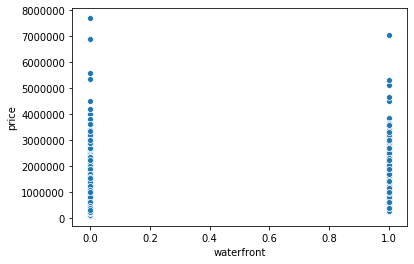

In [528]:
#graphing scatterplot
sns.scatterplot('waterfront','price',data=df)

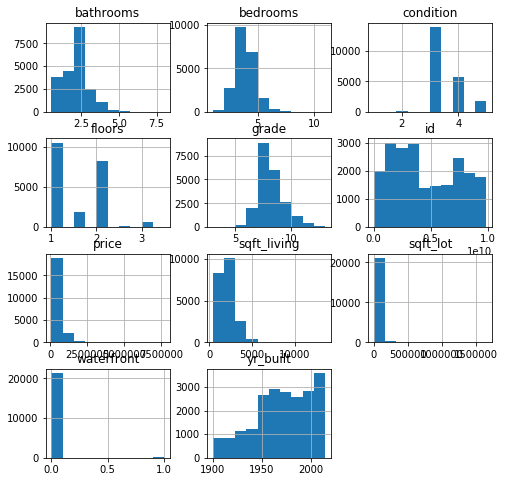

In [529]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

In [530]:
#creating dummy variables for condition?
#5 types of values in condition

Text(0.5, 1.0, 'Average Price of houses based on if they have waterfronts')

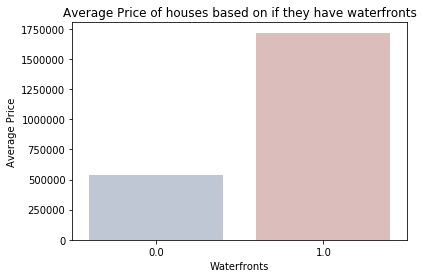

In [531]:
#graphing the average price of houses based on if they have waterfronts
type_list=list(df.waterfront.unique())
average_price2=[]

for i in type_list:
    x=df[df.waterfront==i]
    average_price2.append(sum(x.price)/len(x))
df2=pd.DataFrame({'type_list':type_list,'average_price':average_price2})

plt.figure()
ax=sns.barplot(x=df2.type_list,y=df2.average_price,palette='vlag')
plt.xlabel('Waterfronts')
plt.ylabel('Average Price')
plt.title('Average Price of houses based on if they have waterfronts')

Text(0.5, 0, 'Grade')

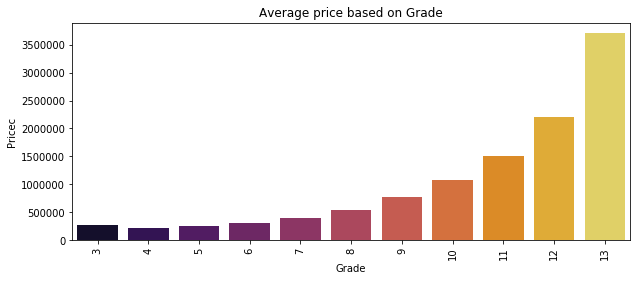

In [532]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = df.groupby(['grade'])['price'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['price'], x = cnt.index, palette= 'inferno')
ax.set_title('Average price based on Grade')
ax.set_ylabel('Pricec')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('Grade')

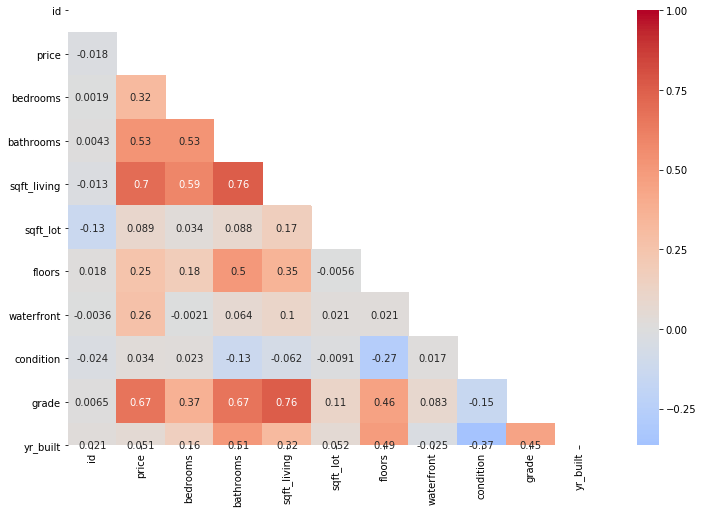

In [533]:
#correlation heatmap
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

# TRAIN/TEST SPLIT

<b>Initally splitting the predictors and target variables from each other:

In [534]:
# Pre-processing
X = df.drop('price',axis=1)

y = df['price']
y = pd.DataFrame(y)

In [535]:
# check X and Y shape
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (21419, 10)
y Shape: (21419, 1)


In [536]:
base_reg = LinearRegression().fit(X, y)
base_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [537]:
X.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.00,0.00,0.00,-0.01,-0.13,0.02,-0.00,-0.02,0.01,0.02
bedrooms,0.00,1.00,0.53,0.59,0.03,0.18,-0.00,0.02,0.37,0.16
bathrooms,0.00,0.53,1.00,0.76,0.09,0.50,0.06,-0.13,0.67,0.51
sqft_living,-0.01,0.59,0.76,1.00,0.17,0.35,0.10,-0.06,0.76,0.32
sqft_lot,-0.13,0.03,0.09,0.17,1.00,-0.01,0.02,-0.01,0.11,0.05
floors,0.02,0.18,0.50,0.35,-0.01,1.00,0.02,-0.27,0.46,0.49
waterfront,-0.00,-0.00,0.06,0.10,0.02,0.02,1.00,0.02,0.08,-0.02
condition,-0.02,0.02,-0.13,-0.06,-0.01,-0.27,0.02,1.00,-0.15,-0.37
grade,0.01,0.37,0.67,0.76,0.11,0.46,0.08,-0.15,1.00,0.45
yr_built,0.02,0.16,0.51,0.32,0.05,0.49,-0.02,-0.37,0.45,1.00


In [538]:
train, test = train_test_split(df)

In [539]:
train.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
17754,9320990120,345000.00,4,2.50,2040,5523,2.00,0.00,3,7,1999
6793,4024101440,375000.00,3,2.50,1950,6871,2.00,0.00,3,8,1997
20567,9151600055,749000.00,4,2.75,2700,6000,2.00,0.00,4,8,1910
15157,2597670080,370000.00,4,2.50,2570,7753,2.00,0.00,3,8,1987
20824,3438500253,616950.00,5,3.50,3560,5008,2.00,0.00,3,8,2013


<B>Preforming the train/test split:

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.80)
# Scaling the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [541]:
# check the shape
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (17135, 10)
X_test Shape: (4284, 10)
y_train Shape: (17135, 1)
y_test Shape: (4284, 1)


In [542]:
lin_reg = LinearRegression()

In [543]:
lin_reg.fit(X_train,y_train);

In [544]:
lin_reg.score(X_train,y_train)

0.6450704751808279

# FEATURE ENGINEERING

<b>Creating polynomial features:

In [545]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

In [546]:
# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train)

In [547]:
#displaying data in x_ploy_train
X_poly_train

array([[1.00000000e+00, 9.82870174e+09, 2.00000000e+00, ...,
        4.90000000e+01, 1.40420000e+04, 4.02403600e+06],
       [1.00000000e+00, 4.14245048e+09, 3.00000000e+00, ...,
        4.90000000e+01, 1.40280000e+04, 4.01601600e+06],
       [1.00000000e+00, 5.65260116e+09, 4.00000000e+00, ...,
        4.90000000e+01, 1.37200000e+04, 3.84160000e+06],
       ...,
       [1.00000000e+00, 6.38150064e+09, 3.00000000e+00, ...,
        3.60000000e+01, 1.16640000e+04, 3.77913600e+06],
       [1.00000000e+00, 3.33050088e+09, 2.00000000e+00, ...,
        4.90000000e+01, 1.33560000e+04, 3.64046400e+06],
       [1.00000000e+00, 2.07640005e+09, 4.00000000e+00, ...,
        4.90000000e+01, 1.36990000e+04, 3.82984900e+06]])

In [548]:
# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)
reg_poly

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [549]:
# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)
X_poly_test

array([[1.00000000e+00, 2.02504919e+09, 3.00000000e+00, ...,
        6.40000000e+01, 1.60640000e+04, 4.03206400e+06],
       [1.00000000e+00, 3.32350001e+09, 3.00000000e+00, ...,
        6.40000000e+01, 1.56240000e+04, 3.81420900e+06],
       [1.00000000e+00, 8.64810020e+09, 4.00000000e+00, ...,
        4.90000000e+01, 1.39860000e+04, 3.99200400e+06],
       ...,
       [1.00000000e+00, 3.83271068e+09, 4.00000000e+00, ...,
        4.90000000e+01, 1.38460000e+04, 3.91248400e+06],
       [1.00000000e+00, 7.20227106e+09, 4.00000000e+00, ...,
        6.40000000e+01, 1.60080000e+04, 4.00400100e+06],
       [1.00000000e+00, 3.22059311e+08, 4.00000000e+00, ...,
        4.90000000e+01, 1.39510000e+04, 3.97204900e+06]])

In [550]:
# Get predeicted values for polynomial training data to compute MSE
y_trainpred = reg_poly.predict(X_poly_train)
y_trainpred

array([[317188.74982292],
       [294942.70193839],
       [421297.51773954],
       ...,
       [239660.48800912],
       [513957.47106378],
       [439937.54391983]])

In [551]:
# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)
y_pred

array([[321735.62141834],
       [606203.79822348],
       [277246.78146935],
       ...,
       [343573.87751771],
       [578307.36627005],
       [392003.18650532]])

In [552]:
# Evaluate model performance on test data
print("degree %d" % 2, r2_score(y_test, y_pred))

degree 2 0.6390289200455203


In [553]:
# Transform the full data
X_poly = poly.transform(X)
X_poly

array([[1.00000000e+00, 7.12930052e+09, 3.00000000e+00, ...,
        4.90000000e+01, 1.36850000e+04, 3.82202500e+06],
       [1.00000000e+00, 6.41410019e+09, 3.00000000e+00, ...,
        4.90000000e+01, 1.36570000e+04, 3.80640100e+06],
       [1.00000000e+00, 5.63150040e+09, 2.00000000e+00, ...,
        3.60000000e+01, 1.15980000e+04, 3.73648900e+06],
       ...,
       [1.00000000e+00, 1.52330014e+09, 2.00000000e+00, ...,
        4.90000000e+01, 1.40630000e+04, 4.03608100e+06],
       [1.00000000e+00, 2.91310100e+08, 3.00000000e+00, ...,
        6.40000000e+01, 1.60320000e+04, 4.01601600e+06],
       [1.00000000e+00, 1.52330016e+09, 2.00000000e+00, ...,
        4.90000000e+01, 1.40560000e+04, 4.03206400e+06]])

In [554]:
# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)
y_poly

array([[322221.14320689],
       [573913.7970789 ],
       [296859.78779506],
       ...,
       [202908.91726643],
       [342167.26374181],
       [205201.65122706]])

In [555]:
# The coefficients
print('Coefficients: \n', reg_poly.coef_)
train_mse = mean_squared_error(y_train, y_trainpred)
print('Train Mean Squarred Error:', train_mse)
print('r_squared_score:',r2_score(y_train, y_trainpred))

Coefficients: 
 [[-1.32921901e-04  3.07716330e-04 -3.82909763e-07 -3.17233292e-07
   1.38796634e-04 -3.39397505e-03 -6.14802457e-05  2.72319334e-05
  -1.99188041e-04 -4.81460534e-04  1.52431773e-03  1.05384451e-16
  -3.90736697e-06  8.27752428e-06 -2.02147348e-08 -1.55228890e-10
   3.81699008e-06  1.17626605e-04  4.38586153e-06  1.90713600e-05
  -2.22783530e-07 -2.96783173e-06  2.94906534e-06 -8.84774941e-04
  -2.60062456e-01 -1.57292037e-06  2.16980009e-07  3.60624995e-06
   1.38836924e-06 -1.54343877e-03  7.22206712e-06  5.47793553e-03
   4.89318323e-01  3.01063433e-07  2.56362928e-07  6.19921184e-06
   1.33549998e-05  1.17800904e-03  4.49269280e-02 -1.54474971e-03
   2.57607693e-04  2.95089554e-04  4.07747956e-03  9.00400718e-03
   3.72921645e-02  7.55236149e-07  1.05531517e-01  7.63659050e-03
   1.10574909e-01  7.19563349e-01 -1.50274890e-03 -2.34277339e-06
   1.03512520e-07  1.02493771e-06 -1.14323461e-06 -1.24832601e-03
   6.02008207e-08  2.45065996e-07  6.30549642e-07  1.1852864

In [556]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

<B>Converting train poly to data frame:

In [557]:
#converting the array into a dataframe
X_poly_train = pd.DataFrame(X_poly_train)

In [558]:
#obtaining the column names
cols = poly.get_feature_names(X.columns)

In [559]:
#adds the column names to the data frame
X_poly_train.columns = cols

In [560]:
X_poly_train.head()

,1,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,waterfront^2,waterfront condition,waterfront grade,waterfront yr_built,condition^2,condition grade,condition yr_built,grade^2,grade yr_built,yr_built^2
0,1.00,9828701741.00,2.00,2.75,1465.00,972.00,2.00,0.00,3.00,7.00,...,0.00,0.00,0.00,0.00,9.00,21.00,6018.00,49.00,14042.00,4024036.00
1,1.00,4142450480.00,3.00,2.50,1520.00,3593.00,2.00,0.00,3.00,7.00,...,0.00,0.00,0.00,0.00,9.00,21.00,6012.00,49.00,14028.00,4016016.00
2,1.00,5652601155.00,4.00,1.75,1960.00,6138.00,1.00,0.00,4.00,7.00,...,0.00,0.00,0.00,0.00,16.00,28.00,7840.00,49.00,13720.00,3841600.00
3,1.00,6072400470.00,4.00,2.50,2070.00,10244.00,1.00,0.00,3.00,8.00,...,0.00,0.00,0.00,0.00,9.00,24.00,5907.00,64.00,15752.00,3876961.00
4,1.00,3275860240.00,3.00,2.25,2910.00,10204.00,2.00,0.00,3.00,9.00,...,0.00,0.00,0.00,0.00,9.00,27.00,5970.00,81.00,17910.00,3960100.00


In [578]:
X_poly_train.columns

Index(['1', 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'id^2', 'id bedrooms',
       'id bathrooms', 'id sqft_living', 'id sqft_lot', 'id floors',
       'id waterfront', 'id condition', 'id grade', 'id yr_built',
       'bedrooms^2', 'bedrooms bathrooms', 'bedrooms sqft_living',
       'bedrooms sqft_lot', 'bedrooms floors', 'bedrooms waterfront',
       'bedrooms condition', 'bedrooms grade', 'bedrooms yr_built',
       'bathrooms^2', 'bathrooms sqft_living', 'bathrooms sqft_lot',
       'bathrooms floors', 'bathrooms waterfront', 'bathrooms condition',
       'bathrooms grade', 'bathrooms yr_built', 'sqft_living^2',
       'sqft_living sqft_lot', 'sqft_living floors', 'sqft_living waterfront',
       'sqft_living condition', 'sqft_living grade', 'sqft_living yr_built',
       'sqft_lot^2', 'sqft_lot floors', 'sqft_lot waterfront',
       'sqft_lot condition', 'sqft_lot grade', 'sqft_lot yr_built', 'floor

<B>Converting test poly to data frame:

In [561]:
#converting the array into a dataframe
X_poly_test = pd.DataFrame(X_poly_test)

In [562]:
#obtaining the column names
cols = poly.get_feature_names(X.columns)

In [563]:
#adds the column names to the data frame
X_poly_test.columns = cols

In [564]:
X_poly_test.head()

,1,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,waterfront^2,waterfront condition,waterfront grade,waterfront yr_built,condition^2,condition grade,condition yr_built,grade^2,grade yr_built,yr_built^2
0,1.00,2025049192.00,3.00,2.50,1380.00,1389.00,3.00,0.00,3.00,8.00,...,0.00,0.00,0.00,0.00,9.00,24.00,6024.00,64.00,16064.00,4032064.00
1,1.00,3323500010.00,3.00,2.50,2100.00,15120.00,1.00,0.00,4.00,8.00,...,0.00,0.00,0.00,0.00,16.00,32.00,7812.00,64.00,15624.00,3814209.00
2,1.00,8648100200.00,4.00,2.50,2050.00,10271.00,2.00,0.00,3.00,7.00,...,0.00,0.00,0.00,0.00,9.00,21.00,5994.00,49.00,13986.00,3992004.00
3,1.00,3904980360.00,3.00,2.50,1800.00,7318.00,2.00,0.00,3.00,8.00,...,0.00,0.00,0.00,0.00,9.00,24.00,5967.00,64.00,15912.00,3956121.00
4,1.00,6341000221.00,4.00,2.00,1340.00,8190.00,1.00,0.00,4.00,7.00,...,0.00,0.00,0.00,0.00,16.00,28.00,7768.00,49.00,13594.00,3771364.00


# LINEAR REGRESSION

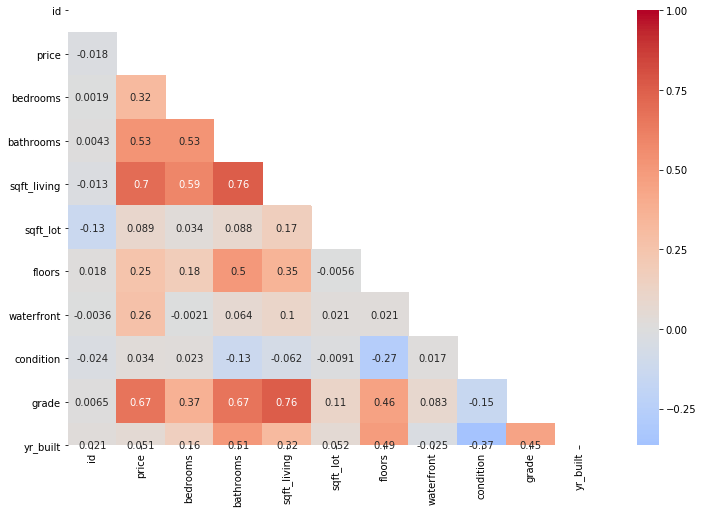

In [275]:
#correlation heatmap
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

# INITIAL REGRESSION MODEL

<b>Fitting and evaluting the initial model:

In [481]:
#assiging the object
lin_reg = LinearRegression()

In [565]:
#fitting the model
lin_reg.fit(X_poly_train,y_train);

In [566]:
#
lin_reg.score(X_poly_train,y_train)

0.6558485020815009

<b>Running regression model:

In [577]:
X_poly_train

,1,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,waterfront^2,waterfront condition,waterfront grade,waterfront yr_built,condition^2,condition grade,condition yr_built,grade^2,grade yr_built,yr_built^2
0,1.00,9828701741.00,2.00,2.75,1465.00,972.00,2.00,0.00,3.00,7.00,...,0.00,0.00,0.00,0.00,9.00,21.00,6018.00,49.00,14042.00,4024036.00
1,1.00,4142450480.00,3.00,2.50,1520.00,3593.00,2.00,0.00,3.00,7.00,...,0.00,0.00,0.00,0.00,9.00,21.00,6012.00,49.00,14028.00,4016016.00
2,1.00,5652601155.00,4.00,1.75,1960.00,6138.00,1.00,0.00,4.00,7.00,...,0.00,0.00,0.00,0.00,16.00,28.00,7840.00,49.00,13720.00,3841600.00
3,1.00,6072400470.00,4.00,2.50,2070.00,10244.00,1.00,0.00,3.00,8.00,...,0.00,0.00,0.00,0.00,9.00,24.00,5907.00,64.00,15752.00,3876961.00
4,1.00,3275860240.00,3.00,2.25,2910.00,10204.00,2.00,0.00,3.00,9.00,...,0.00,0.00,0.00,0.00,9.00,27.00,5970.00,81.00,17910.00,3960100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17130,1.00,8732190200.00,4.00,2.25,2490.00,7233.00,1.00,0.00,3.00,8.00,...,0.00,0.00,0.00,0.00,9.00,24.00,5934.00,64.00,15824.00,3912484.00
17131,1.00,5288200260.00,2.00,1.75,2470.00,4600.00,1.00,0.00,4.00,7.00,...,0.00,0.00,0.00,0.00,16.00,28.00,7664.00,49.00,13412.00,3671056.00
17132,1.00,6381500635.00,3.00,1.00,1260.00,6826.00,1.00,0.00,3.00,6.00,...,0.00,0.00,0.00,0.00,9.00,18.00,5832.00,36.00,11664.00,3779136.00
17133,1.00,3330500875.00,2.00,1.00,1320.00,3090.00,1.00,0.00,4.00,7.00,...,0.00,0.00,0.00,0.00,16.00,28.00,7632.00,49.00,13356.00,3640464.00


In [572]:
results = model.fit()

In [573]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3112.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:23:22   Log-Likelihood:            -2.3521e+05
No. Observations:               17135   AIC:                         4.704e+05
Df Residuals:                   17124   BIC:                         4.705e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.78e+06   1.48e+05     45.791      0.000    6.49e+06    7.07e+06
id          -2.006e-06   5.95e-07     -3.371      0.001   -3.17e-06    -8.4e-07
bedrooms     -4.75e+04   2435.773    -19.502      0.000   -5.23e+04   -4.27e+04
bathrooms    5.155e+04   3938.671     13.087      0.000    4.38e+04    5.93e+04
sqft_living   181.2737      3.769     48.094      0.000     173.886     188.662
sqft_lot       -0.2862      0.044     -6.466      0.000      -0.373      -0.199
floors       1.869e+04   3920.045      4.768      0.000     1.1e+04    2.64e+04
waterfront   7.228e+05   2.07e+04     34.960      0.000    6.82e+05    7.63e+05
condition    1.842e+04   2826.129      6.518      0.000    1.29e+04     2.4e+04
grade        1.318e+05   2443.234     53.951      0.000    1.27e+05    1.37e+05
yr_built    -3884.1890     76.090    -51.047      0.000   -4033.333   -3735.045
==============================================================================
Omnibus:                    13365.426   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1000913.593
Skew:                           3.181   Prob(JB):                         0.00
Kurtosis:                      39.898   Cond. No.                     4.72e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [279]:
results.pvalues

const         0.00
id            0.00
bedrooms      0.00
bathrooms     0.00
sqft_living   0.00
sqft_lot      0.00
floors        0.00
waterfront    0.00
condition     0.00
grade         0.00
yr_built      0.00
dtype: float64

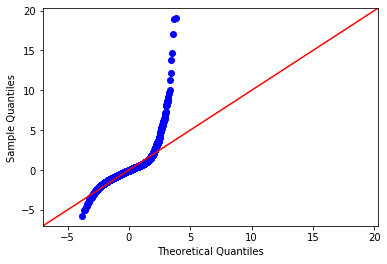

In [280]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

In [281]:
plt.plot(results.predict(train[x_cols]), [0 for i in range(len(train))])

NameError: name 'x_cols' is not defined

Id will be removed as a predictor as it is not statistically relevant. In addition to that bathrooms has a p-value of 0.21 which is greater than the significance level of 0.05, indicating that it is not statistically significant.

From this initial baseline model we can see that there are multiple negative coefficients indicating that there is a negative relation ship between those predictors and the target variable. Where for example a one unit increase in yr_built will lead to a -$431.24 reduction in the price whilst the other variables are held constant.

<b>Checking for multicollinearity between variables

In [ ]:
#correlation heatmap with predictor variables to check if they correlate with each other
plt.figure(figsize=(12,8))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

In [ ]:
#from this correlation heatmap we can see that there is a high correlation between:
#sqft_living and bathrooms at 0.76
#grade and sqft_living at 0.76
#bathrooms and grade at 0.67
#sqft_living and bedrooms at 0.58

#there is high multicollinearity

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
corr_threshold = (corr > 0.5) | (corr < -0.5)

plt.figure(figsize=(16,16))
sns.heatmap(corr_threshold, annot=True, mask=mask)
plt.autoscale()
plt.show()

# REMOVING UNNESSARY FEATURES

In [282]:
#removing all the columns that gave a negative coefficient
X_train.drop(['id','bedrooms','bathrooms','floors','yr_built'], axis=1, inplace=True)
X_test.drop(['id','bedrooms','bathrooms','floors','yr_built'], axis=1, inplace=True)

In [283]:
X_train.head()

,bedrooms,bathrooms,sqft_lot,waterfront,condition,grade
10643,2,2.75,972,0.00,3,7
16293,3,2.50,3593,0.00,3,7
15429,4,1.75,6138,0.00,4,7
17294,4,2.50,10244,0.00,3,8
124,3,2.25,10204,0.00,3,9


In [284]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)

In [285]:
results = model.fit()

In [286]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     3081.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:26:17   Log-Likelihood:            -2.3781e+05
No. Observations:               17135   AIC:                         4.756e+05
Df Residuals:                   17128   BIC:                         4.757e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.291e+06   1.87e+04    -68.961      0.000   -1.33e+06   -1.25e+06
bedrooms    1.455e+04   2592.112      5.614      0.000    9470.690    1.96e+04
bathrooms   6.114e+04   3784.736     16.153      0.000    5.37e+04    6.86e+04
sqft_lot       0.0725      0.050      1.443      0.149      -0.026       0.171
waterfront  8.915e+05   2.39e+04     37.253      0.000    8.45e+05    9.38e+05
condition   7.463e+04   3082.921     24.206      0.000    6.86e+04    8.07e+04
grade       1.818e+05   2261.643     80.389      0.000    1.77e+05    1.86e+05
==============================================================================
Omnibus:                    15410.614   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1675098.056
Skew:                           3.895   Prob(JB):                         0.00
Kurtosis:                      50.807   Cond. No.                     5.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
results.pvalues

const         0.00
sqft_living   0.00
sqft_lot      0.00
waterfront    0.00
condition     0.00
grade         0.00
dtype: float64

With this modified model we can see that there is a much more improved r2 value

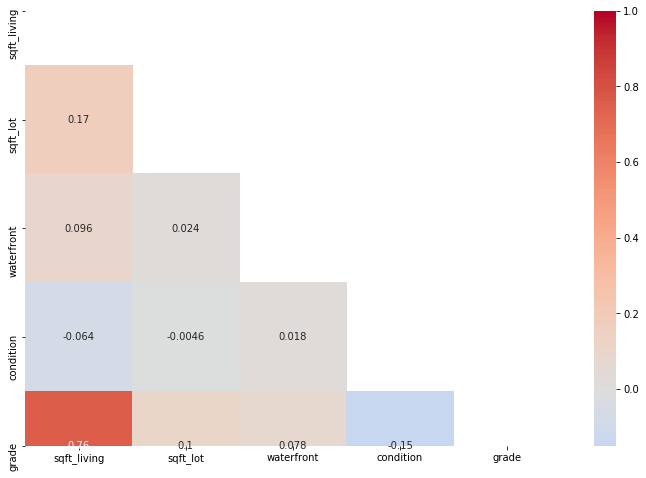

In [208]:
#correlation heatmap with predictor variables to check if they correlate with each other
plt.figure(figsize=(12,8))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

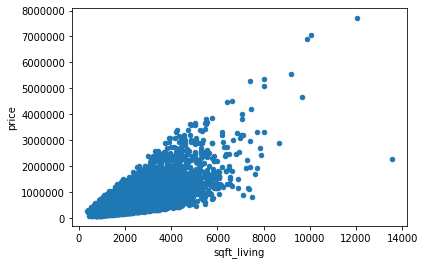

In [209]:
ax = df.plot.scatter(x='sqft_living', y='price');

# FINAL MODEL

In [287]:
#removing all the columns that gave a negative coefficient
X_train.drop(['sqft_lot','condition'], axis=1, inplace=True)
X_test.drop(['sqft_lot','condition'], axis=1, inplace=True)

In [288]:
X_train.head()

,bedrooms,bathrooms,waterfront,grade
10643,2,2.75,0.00,7
16293,3,2.50,0.00,7
15429,4,1.75,0.00,7
17294,4,2.50,0.00,8
124,3,2.25,0.00,9


In [289]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)

In [290]:
results = model.fit()

In [291]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     4327.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:26:41   Log-Likelihood:            -2.3810e+05
No. Observations:               17135   AIC:                         4.762e+05
Df Residuals:                   17130   BIC:                         4.762e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.007e+06   1.48e+04    -68.019      0.000   -1.04e+06   -9.78e+05
bedrooms    2.145e+04   2619.953      8.189      0.000    1.63e+04    2.66e+04
bathrooms   5.348e+04   3834.111     13.948      0.000     4.6e+04     6.1e+04
waterfront  9.128e+05   2.43e+04     37.535      0.000    8.65e+05     9.6e+05
grade       1.772e+05   2286.358     77.495      0.000    1.73e+05    1.82e+05
==============================================================================
Omnibus:                    15212.477   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1558783.219
Skew:                           3.831   Prob(JB):                         0.00
Kurtosis:                      49.093   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""